In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/car_brand_classifier/Datasets.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/car_brand_classifier/')
zip_ref.close()

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/car_brand_classifier/Datasets/Train'
valid_path = '/content/drive/MyDrive/car_brand_classifier/Datasets/Test'

In [4]:
# Import the Resnet 50 library as shown below and add preprocessing layer to the front of Resnet
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 4s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/car_brand_classifier/Datasets/Train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/car_brand_classifier/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/car_brand_classifier/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-14-6a59a8552182>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 41s 30s/step - loss: 4.5895 - accuracy: 0.3906 - val_loss: 14.2525 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 1s 759ms/step - loss: 7.7017 - accuracy: 0.3281 - val_loss: 1.9144 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 738ms/step - loss: 2.7154 - accuracy: 0.4219 - val_loss: 3.5884 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 1s 730ms/step - loss: 4.0976 - accuracy: 0.4375 - val_loss: 3.7745 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 1s 739ms/step - loss: 2.9656 - accuracy: 0.4062 - val_loss: 2.9479 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 1s 741ms/step - loss: 2.7802 - accuracy: 0.3906 - val_loss: 2.6294 - val_accuracy: 0.4828
Epoch 7/50
2/2 [==============================] - 1s 739ms/step - loss: 2.6442 - accuracy: 0.5312 - val_loss: 2.2541 - val_accuracy: 0.5345
Epoch 8/50
2/2 [====

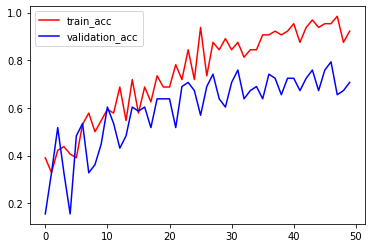

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train_acc')
plt.plot(history.history['val_accuracy'], color='blue', label='validation_acc')
plt.legend()
plt.show()

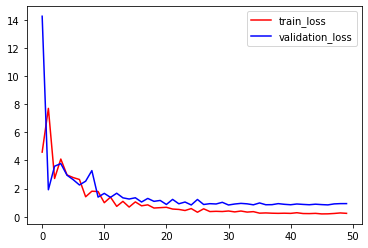

In [16]:
plt.plot(history.history['loss'], color='red', label='train_loss')
plt.plot(history.history['val_loss'], color='blue', label='validation_loss')
plt.legend()
plt.show()

In [17]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_reset50.h5')

In [18]:
y_pred = model.predict(test_set)

2/2 [==============================] - 1s 120ms/step


In [19]:
y_pred

array([[1.44443735e-02, 6.81598306e-01, 3.03957283e-01],
       [1.82378513e-03, 9.86058772e-01, 1.21174566e-02],
       [1.32143369e-03, 7.74290562e-01, 2.24388048e-01],
       [9.71315429e-02, 7.84117997e-01, 1.18750468e-01],
       [1.88012466e-01, 7.05806971e-01, 1.06180601e-01],
       [6.21741474e-01, 5.09387143e-02, 3.27319771e-01],
       [7.87130073e-02, 8.05495977e-01, 1.15791038e-01],
       [1.00502018e-02, 9.57949996e-01, 3.19997668e-02],
       [4.74389754e-02, 7.75054038e-01, 1.77506998e-01],
       [5.16151078e-03, 9.13248658e-01, 8.15897882e-02],
       [1.48857795e-02, 8.41390371e-01, 1.43723935e-01],
       [2.11755093e-03, 9.59957421e-01, 3.79250161e-02],
       [2.57708272e-03, 9.97067511e-01, 3.55431228e-04],
       [1.30897118e-02, 1.70652196e-02, 9.69845057e-01],
       [3.55444312e-01, 2.31103808e-01, 4.13451880e-01],
       [8.83496905e-05, 9.97133136e-01, 2.77852523e-03],
       [3.31488371e-01, 6.33430302e-01, 3.50813493e-02],
       [6.57693371e-02, 6.29989

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1])

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model = load_model('/content/model_reset50.h5')

In [25]:
img = image.load_img('/content/drive/MyDrive/car_brand_classifier/Datasets/Test/lamborghini/11.jpg', target_size=(224,224))

In [26]:
x = image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [27]:
x.shape

(224, 224, 3)

In [28]:
x = x/255

In [29]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
img_data

array([[[[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.264496, -116.04567 , -122.91137 ],
         [-103.18214 , -115.96331 , -122.82902 ],
         [-103.08018 , -115.86135 , -122.72706 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.00959 , -115.818214, -122.719215],
         [-103.01743 , -115.82606 , -122.72706 ],
         [-103.021355, -115.82998 , -122.73098 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-102.96645 , -115.80253 , -122.73882 ],
         [-102.95861 , -115.794685, -122.73098 ],
         [-102.95861 , -115.794685, -122.73098 ]],

        ...,

        [[-103.04096 , -115.96723 , -1

In [31]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[1.1606276e-04, 1.3001369e-03, 9.9858379e-01]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 20ms/step


In [33]:
a==1

array([False])